<a href="https://colab.research.google.com/github/OSegun/Zummit-Africa-ML-AL-Projects/blob/main/DL_Emotion_Dectection_With_FER_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Dection With FER

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 7178 examples.

The dataset can be found in the kaggle website below

https://www.kaggle.com/datasets/msambare/fer2013

In [36]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np
from zipfile import ZipFile

In [37]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json # Download the json file from your kaggle profile to use the kaggle api in your notebook

In [38]:
!kaggle datasets download -d msambare/fer2013 # Downloading the dataset

fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [39]:
IMG_HEIGHT=48 
IMG_WIDTH = 48
batch_size=32

In [40]:
# Upload data and extract the contents

dataset = '/content/fer2013.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [41]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

In [42]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/train',
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

Found 28709 images belonging to 7 classes.


In [43]:
test_set = test_datagen.flow_from_directory('/content/test',
                                            color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

Found 7178 images belonging to 7 classes.


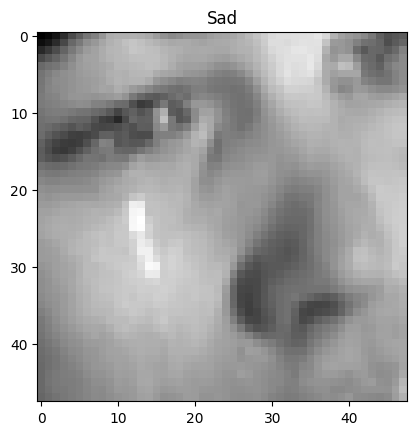

In [44]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = training_set.__next__()

import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [45]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [46]:
num_train_imgs = 0
for root, dirs, files in os.walk('/content/train'):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk('/content/test'):
    num_test_imgs += len(files)


epochs=150

history=model.fit(training_set,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=test_set,
                validation_steps=num_test_imgs//batch_size)

Epoch 1/150
897/897 [==============================] - 33s 35ms/step - loss: 1.7725 - accuracy: 0.2638 - val_loss: 1.6936 - val_accuracy: 0.3245
Epoch 2/150
897/897 [==============================] - 30s 34ms/step - loss: 1.6602 - accuracy: 0.3344 - val_loss: 1.4885 - val_accuracy: 0.4280
Epoch 3/150
897/897 [==============================] - 27s 30ms/step - loss: 1.5182 - accuracy: 0.4096 - val_loss: 1.3534 - val_accuracy: 0.4830
Epoch 4/150
897/897 [==============================] - 28s 31ms/step - loss: 1.4238 - accuracy: 0.4503 - val_loss: 1.2767 - val_accuracy: 0.5080
Epoch 5/150
897/897 [==============================] - 31s 34ms/step - loss: 1.3596 - accuracy: 0.4808 - val_loss: 1.2044 - val_accuracy: 0.5364
Epoch 6/150
897/897 [==============================] - 29s 32ms/step - loss: 1.3286 - accuracy: 0.4893 - val_loss: 1.1897 - val_accuracy: 0.5442
Epoch 7/150
897/897 [==============================] - 31s 34ms/step - loss: 1.2997 - accuracy: 0.5040 - val_loss: 1.1976 - val_ac

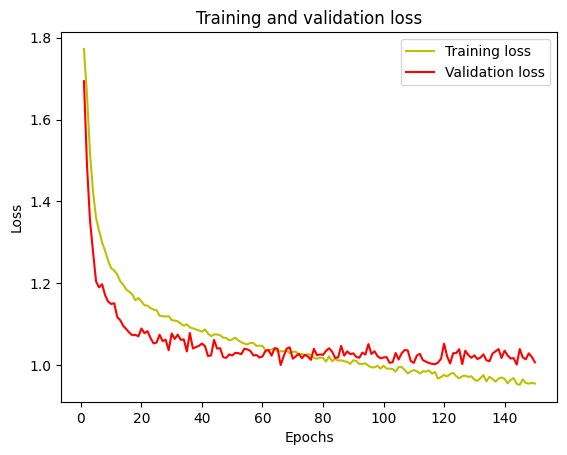

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

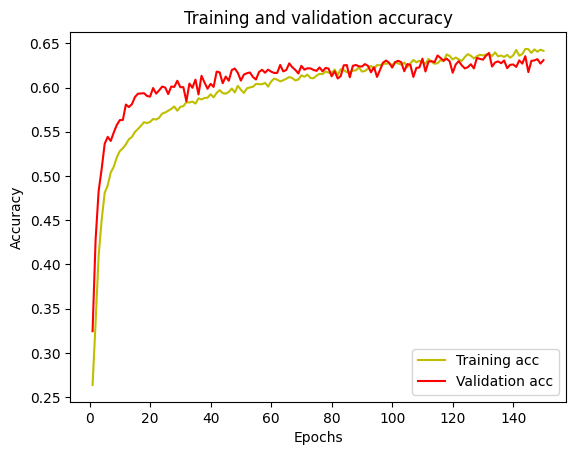

In [48]:
acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
model.save('emotion_detection_model_150epochs.h5')

1/1 [==============================] - 0s 112ms/step
Accuracy =  0.53125


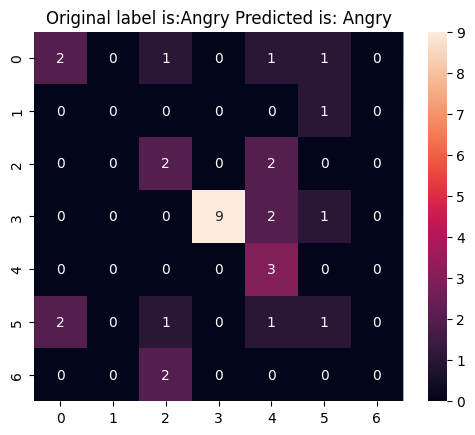

In [50]:
from keras.models import load_model


#Test the model
my_model = load_model('emotion_detection_model_100epochs.h5', compile=False)

#Generate a batch of images
test_img, test_lbl = test_set.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
#print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()